숫자, 스케일, 전처리
    -> 새로 입력하는 데이터에도 동일하게 적용해야 한다.


⚖️ StandardScaler vs MinMaxScaler vs RobustScaler
| **특징**        | **StandardScaler**                | **MinMaxScaler**                                                                 | **RobustScaler**                                           |
| ------------- | --------------------------------- | -------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| **정규화 방식**    | 데이터의 **평균**을 0으로, **표준편차**를 1로 변환 | 데이터를 **최소값**과 **최대값**을 기준으로 0과 1 사이로 변환                                          | 중앙값(median)과 **IQR(Interquartile Range)**(사분위 범위)을 기준으로 변환 |
| **수식**        | $Z = \frac{X - \mu}{\sigma}$      | $X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$ | $X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}$ |
| **주요 특징**     | - 데이터가 **정규분포**를 따를 때 가장 잘 작동     | - **최소-최대 범위**로 데이터를 압축                                                          | - \*\*이상치(Outliers)\*\*의 영향을 적게 받음                         |
| **적용 시 주의사항** | - 이상치(outliers)에 민감함              | - 이상치에 민감해 범위가 왜곡될 수 있음                                                          | - 이상치가 많을 때 유용                                             |
| **예시**        | - 키, 몸무게, 점수 등 정규분포에 가까운 데이터      | - 이미지 데이터(픽셀 값), 음성 데이터 등 **0\~1** 범위로 압축 필요할 때                                  | - **로버스트한 회귀 모델**, 이상치가 많은 데이터에 적합                         |
| **적용 예시**     | - 머신러닝 모델(특히 선형 모델)에서 자주 사용       | - 이미지나 음성 처리, 신경망(딥러닝)에서 사용                                                      | - 데이터에 이상치가 많을 때, 예: 금융 데이터 분석                             |

=> 데이터가 이상치인지 아닌지는 데이터분석가가 판단한다.

Normalizer
- 

🧠 언제 어떤 걸 써야 하나요?

| 상황                     | 추천 스케일러            |
| ---------------------- | ------------------ |
| 이상치가 있음                | `StandardScaler`   |
| 값이 0\~1 사이여야 함 (딥러닝 등) | `MinMaxScaler`     |
| 거리 기반 모델 (KNN, SVM 등)  | 둘 다 가능 (상황에 따라 다름) |


In [177]:
# KNN에 Standard를 사용해서 스케일 조정 후에 학습을 진행하세요.
# 1. 데이터 => cancer 데이터
# 2. 나누기 => train/test
# 3. 스케일 => Standard
# 4. 학습 => fit, predict
# 5. 검증 => score
# pip freeze > requirements.txt

## * 모든 from과 import는 최상단에 놓아라 *

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [179]:
cancer = load_breast_cancer()

In [190]:
# tip1. split 하기전에 가능하면 분포를 확인하세요.
unique, counts = np.unique(cancer.target, return_counts=True)
for i, (val, count) in enumerate(zip(unique, counts)):
    print(f"{cancer.target_names[val]}: {count/len(cancer.target)}")

malignant: 0.37258347978910367
benign: 0.6274165202108963


In [ ]:
# 분포가 한쪽에 쏠리면 stratify를 사용해서 균등하게 맞추세요.
# 회귀에서는 안해도 된다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

## load_breast_cancer()와 나이브 베이즈르 사용해서 최적의 스케일러는?

In [186]:
scalers = {
    "None": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
}

In [187]:
scaling_results = {}
for name, scaler in scalers.items():
    if scaler is not None:
       X_train_scaled = scaler.fit_transform(X_train)
       X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    gnb = GaussianNB()
    gnb.fit(X_train_scaled, y_train)
    
    y_pred = gnb.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    scaling_results[name] = {"accuracy": accuracy}

In [188]:
scaling_results

{'None': {'accuracy': 0.9370629370629371},
 'StandardScaler': {'accuracy': 0.9370629370629371},
 'MinMaxScaler': {'accuracy': 0.9370629370629371}}

In [ ]:
# StandardeScaler 적용
scaler = StandardScaler()

# sclar.fit_transfrom 쓰지마라
scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(2, 31)

In [ ]:
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    
    training_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

In [ ]:
best_k = neighbors_settings[np.argmax(test_accuracy)]
best_test_accuracy = max(test_accuracy)
best_k, best_test_accuracy

(5, 0.9790209790209791)

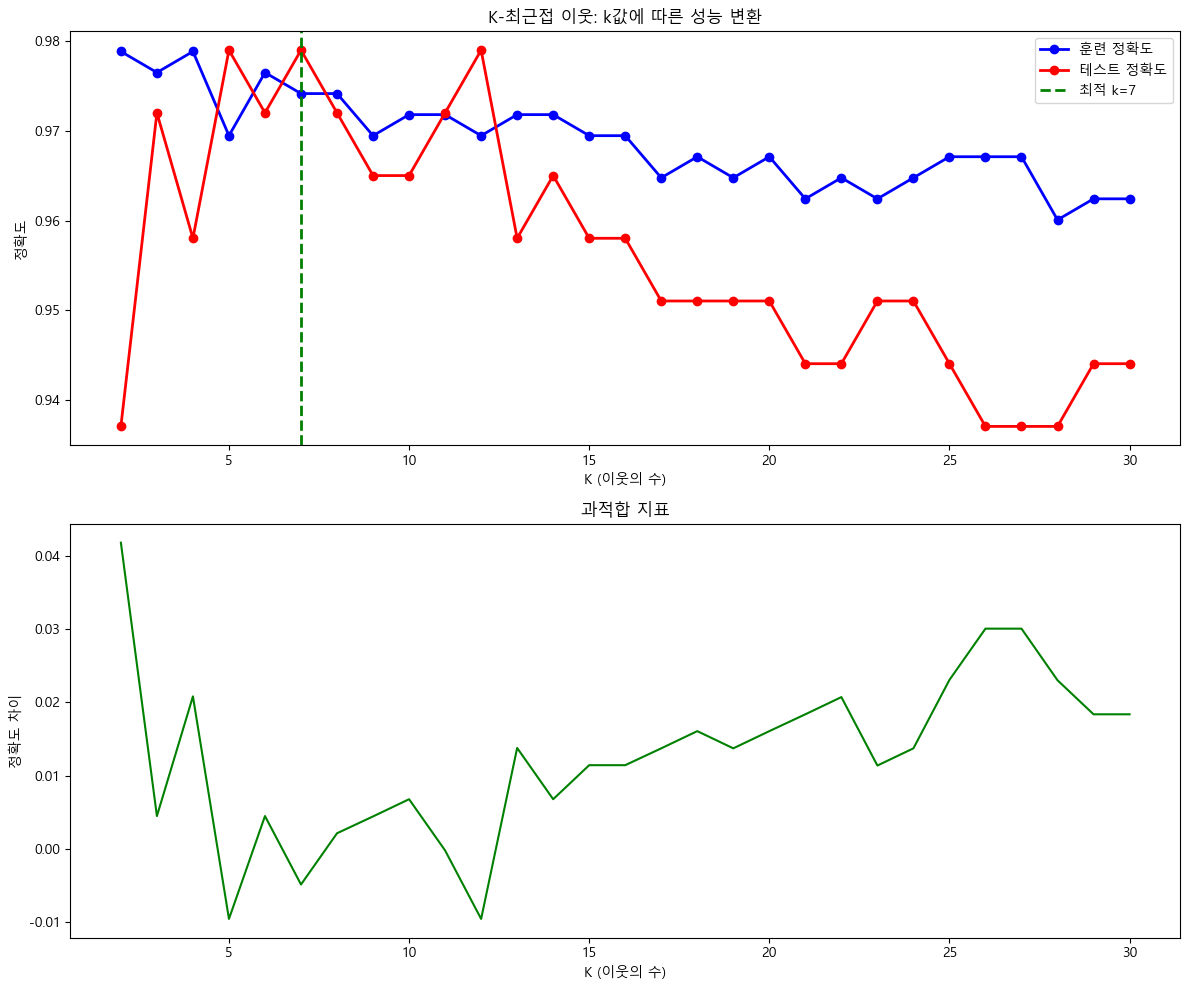

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 정확도 공석
ax1.plot(neighbors_settings, training_accuracy, "o-", label="훈련 정확도", linewidth=2, markersize=6, color="blue")
ax1.plot(neighbors_settings, test_accuracy, "o-", label="테스트 정확도", linewidth=2, markersize=6, color="red")
ax1.axvline(x=neighbors_settings[best_k], color='green', linestyle="--", linewidth=2, label=f"최적 k={neighbors_settings[best_k]}")
ax1.set_ylabel("정확도")
ax1.set_xlabel("K (이웃의 수)")
ax1.set_title("K-최근접 이웃: k값에 따른 성능 변환")
ax1.legend()

# 정확도 차이
accuracy_diff = np.array(training_accuracy) - np.array(test_accuracy)
accuracy_diff
ax2.plot(neighbors_settings, accuracy_diff, "g-", label="훈련-테스트 정확도 차이")
ax2.set_ylabel("정확도 차이")
ax2.set_xlabel("K (이웃의 수)")
ax2.set_title("과적합 지표")
plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9790209790209791


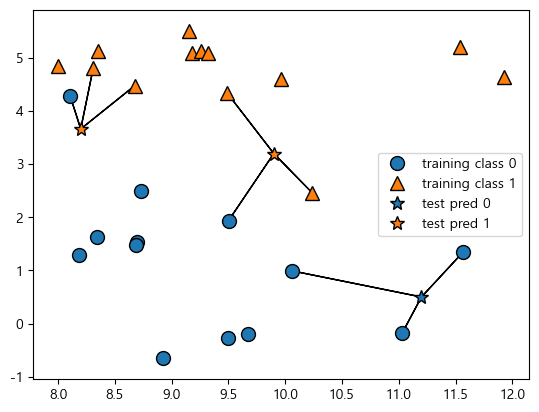

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)